# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # pause for 1 second
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alofi
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | juazeiro do norte
Processing Record 6 of Set 1 | burkhala
City not found. Skipping...
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | meyungs
City not found. Skipping...
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | bela vista do paraiso
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | abu dhabi
Processing Record 20 of Set 1 | grindavik
Processing Record 21 

Processing Record 34 of Set 4 | malanje
Processing Record 35 of Set 4 | artyk
City not found. Skipping...
Processing Record 36 of Set 4 | nanortalik
Processing Record 37 of Set 4 | palaikastron
Processing Record 38 of Set 4 | lavrentiya
Processing Record 39 of Set 4 | mragowo
Processing Record 40 of Set 4 | de aar
Processing Record 41 of Set 4 | omboue
Processing Record 42 of Set 4 | tomatlan
Processing Record 43 of Set 4 | kysyl-syr
Processing Record 44 of Set 4 | bambous virieux
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | lindas
Processing Record 47 of Set 4 | fez
Processing Record 48 of Set 4 | mitsamiouli
Processing Record 49 of Set 4 | saskylakh
Processing Record 0 of Set 5 | dakoro
Processing Record 1 of Set 5 | tambul
City not found. Skipping...
Processing Record 2 of Set 5 | macusani
Processing Record 3 of Set 5 | fowa
Processing Record 4 of Set 5 | baykit
Processing Record 5 of Set 5 | severo-yeniseyskiy
Processing Record

Processing Record 25 of Set 8 | moroto
Processing Record 26 of Set 8 | hovd
Processing Record 27 of Set 8 | rio gallegos
Processing Record 28 of Set 8 | antofagasta
Processing Record 29 of Set 8 | suntar
Processing Record 30 of Set 8 | gondanglegi
Processing Record 31 of Set 8 | millinocket
Processing Record 32 of Set 8 | severomuysk
Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | bom sucesso
Processing Record 35 of Set 8 | santa clarita
Processing Record 36 of Set 8 | yuza
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | kirensk
Processing Record 39 of Set 8 | saint-joseph
Processing Record 40 of Set 8 | dhidhdhoo
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | anadyr
Processing Record 43 of Set 8 | alekseyevsk
Processing Record 44 of Set 8 | chicama
Processing Record 45 of Set 8 | rjukan
Processing Record 46 of Set 8 | esperance
Processing Record 47 of Set 8 | fairview
Processing Record 48 of Set 8 | vestmannaeyjar

Processing Record 14 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 15 of Set 12 | benicarlo
Processing Record 16 of Set 12 | trelleborg
Processing Record 17 of Set 12 | ambon
Processing Record 18 of Set 12 | beloretsk
Processing Record 19 of Set 12 | raymond
Processing Record 20 of Set 12 | laramie
Processing Record 21 of Set 12 | timbiqui
Processing Record 22 of Set 12 | petrozavodsk
Processing Record 23 of Set 12 | gunjur
Processing Record 24 of Set 12 | manggar
Processing Record 25 of Set 12 | sayyan
Processing Record 26 of Set 12 | vanimo
Processing Record 27 of Set 12 | qaqortoq
Processing Record 28 of Set 12 | yandoon
City not found. Skipping...
Processing Record 29 of Set 12 | shenjiamen
Processing Record 30 of Set 12 | porto belo
Processing Record 31 of Set 12 | sabang
Processing Record 32 of Set 12 | plettenberg bay
Processing Record 33 of Set 12 | amapa
Processing Record 34 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 35 of Set 12 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alofi,-19.0595,-169.9187,82.29,83,100,5.75,NU,1680842041
1,castro,-24.7911,-50.0119,59.86,99,100,7.43,BR,1680842044
2,hermanus,-34.4187,19.2345,63.81,88,32,13.35,ZA,1680842045
3,juazeiro do norte,-7.2131,-39.3153,73.36,100,75,2.30,BR,1680842046
4,khatanga,71.9667,102.5000,-18.92,92,100,6.82,RU,1680842049


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,82.29,83,100,5.75,NU,1680842041
1,castro,-24.7911,-50.0119,59.86,99,100,7.43,BR,1680842044
2,hermanus,-34.4187,19.2345,63.81,88,32,13.35,ZA,1680842045
3,juazeiro do norte,-7.2131,-39.3153,73.36,100,75,2.30,BR,1680842046
4,khatanga,71.9667,102.5000,-18.92,92,100,6.82,RU,1680842049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

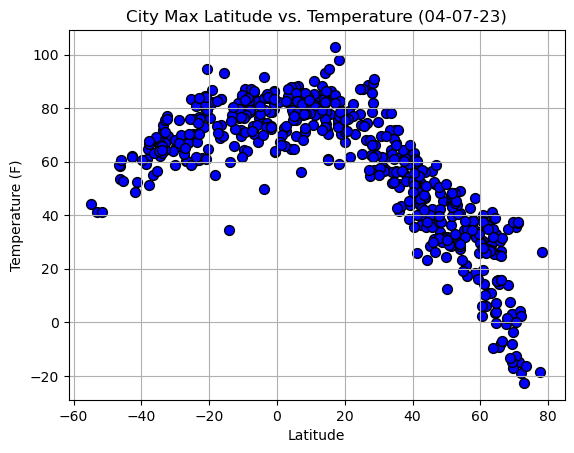

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="blue",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

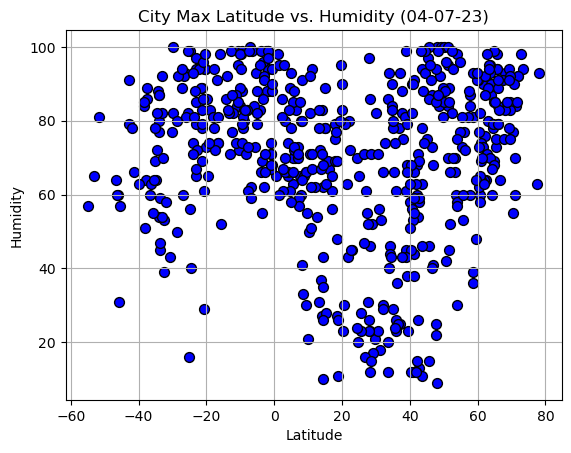

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="blue",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

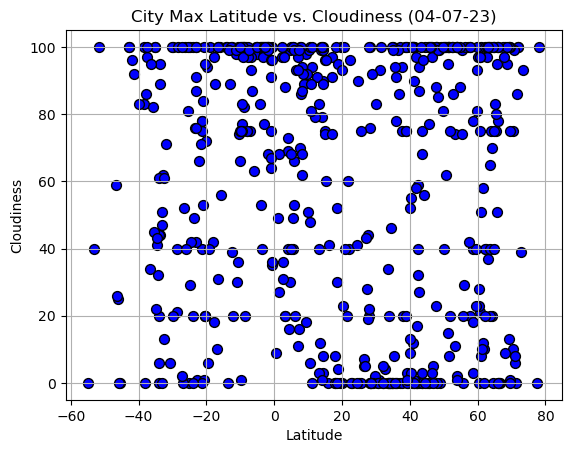

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="blue",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

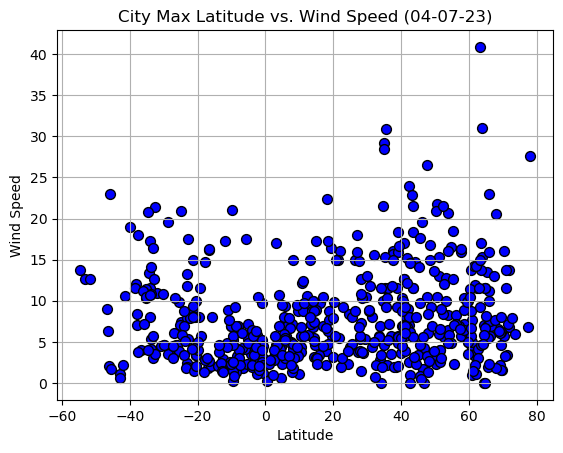

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="blue",
    edgecolor="black",
    linewidth=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, color = color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,khatanga,71.9667,102.5000,-18.92,92,100,6.82,RU,1680842049
6,barrow,71.2906,-156.7887,-14.78,84,0,3.44,US,1680842053
7,dikson,73.5069,80.5464,-16.38,94,93,5.99,RU,1680842054
9,kapaa,22.0752,-159.3190,76.98,80,40,16.11,US,1680841894
10,bethel,41.3712,-73.4140,59.36,44,100,8.05,US,1680842005


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alofi,-19.0595,-169.9187,82.29,83,100,5.75,NU,1680842041
1,castro,-24.7911,-50.0119,59.86,99,100,7.43,BR,1680842044
2,hermanus,-34.4187,19.2345,63.81,88,32,13.35,ZA,1680842045
3,juazeiro do norte,-7.2131,-39.3153,73.36,100,75,2.30,BR,1680842046
5,ushuaia,-54.8000,-68.3000,44.26,57,0,13.80,AR,1680842033


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.791244283075487


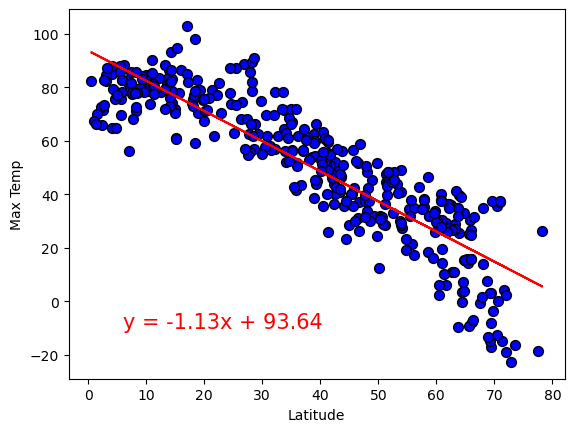

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (6, -10), "blue")


The r-value is: 0.3649248681134678


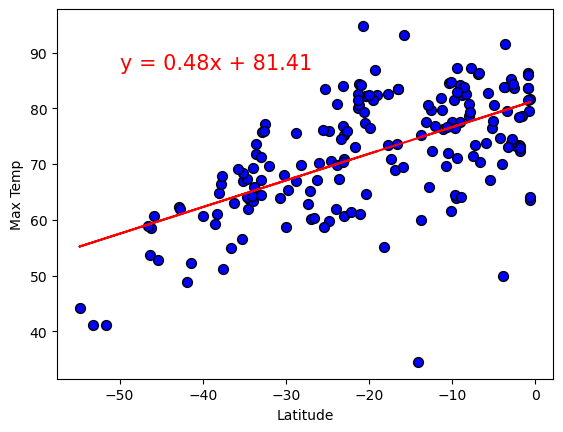

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Max Temp", (-50, 87), "blue")

**Discussion about the linear relationship:** R squared values range from 0 to 1. The higher the r squared value, the closer the correlation is between the two variables. The two variables compared are Latitude and Max Temperature. Since the correlation between them is 0.79 and 0.36 for both the northern hemisphere and southern hemisphere, respectfully. There is a strong negative correlation in the northern hemisphere and weak positive correlation in the southern hemisphere between these two variables.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06479997510191324


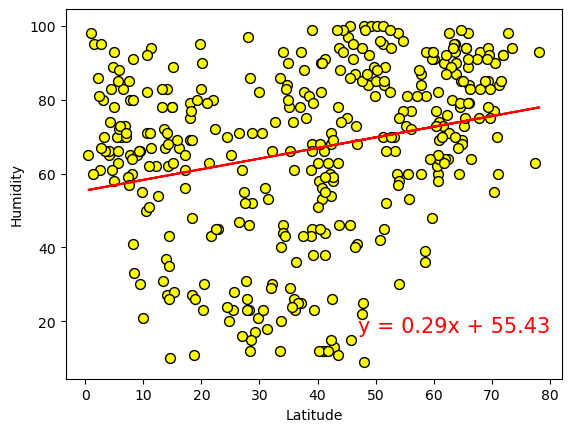

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (47, 17), "yellow")

The r-value is: 0.12013483996102574


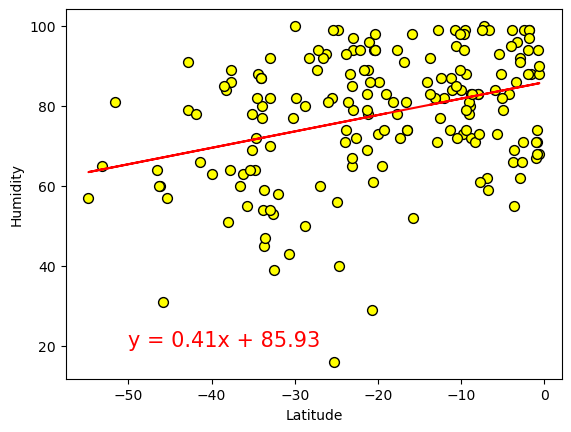

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Humidity", (-50, 20), "yellow")

**Discussion about the linear relationship:** R squared values range from 0 to 1. The higher the r squared value, the closer the correlation is between the two variables. The two variables compared are Latitude and Humidity. Since the correlation between them is 0.06 and 0.12 for both the northern hemisphere and southern hemisphere, respectfully. There is no correlation in the northern hemisphere and no correlation in the southern hemisphere between these two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0006515751328096709


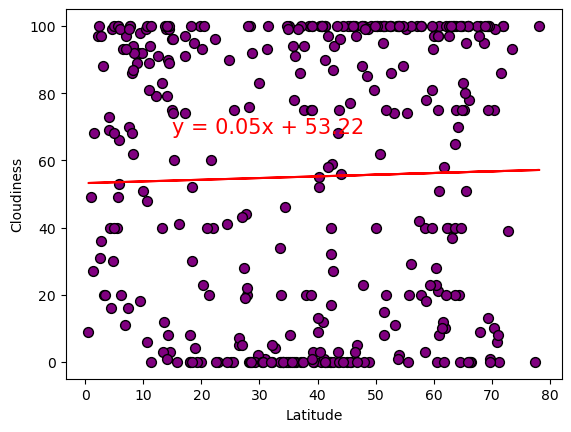

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (15, 68), "purple")

The r-value is: 0.11963881478986425


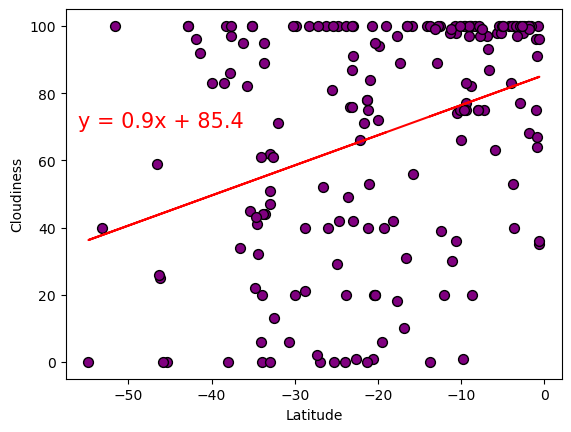

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Cloudiness", (-56, 70), "purple")

**Discussion about the linear relationship:**  R squared values range from 0 to 1. The higher the r squared value, the closer the correlation is between the two variables. The two variables compared are Latitude and Cloudiness. Since the correlation between them is 0.00 and 0.12 for both the northern hemisphere and southern hemisphere, respectfully. There is no correlation in the northern hemisphere and no correlation in the southern hemisphere between these two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03063990319248239


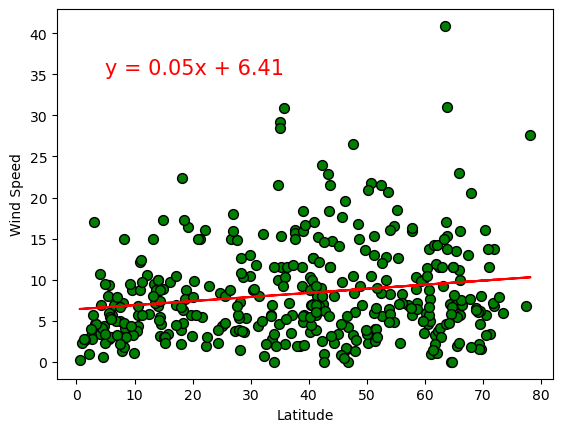

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (5, 35), "green")

The r-value is: 0.15464858660856257


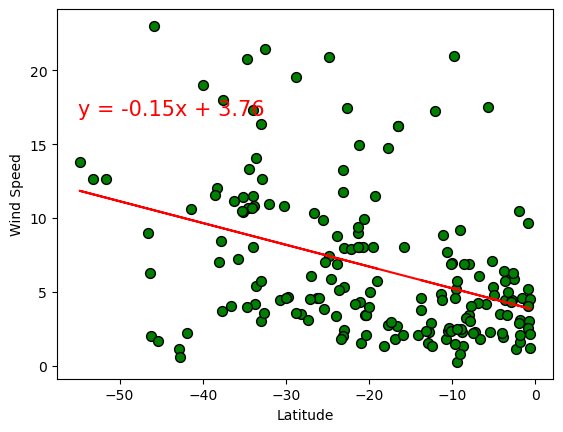

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Wind Speed", (-55, 17), "green")

**Discussion about the linear relationship:**  R squared values range from 0 to 1. The higher the r squared value, the closer the correlation is between the two variables. The two variables compared are Latitude and Wind Speed. Since the correlation between them is 0.03 and 0.15 for both the northern hemisphere and southern hemisphere, respectfully. There is no correlation in the northern hemisphere and no correlation in the southern hemisphere between these two variables.